In [4]:

from Mancala import Mancala
from MancalaAI import MancalaAI, get_alpha_beta_minimax_move, get_basic_minimax_move
import numpy as np
import time
import matplotlib.pyplot as plt

# Simulating 100,000 rounds of random vs. random:

In [16]:
# simulating 100000 rounds of random vs random
num_sims = 100000
rand_p1_wins = 0
rand_p2_wins = 0
num_ties = 0
moves_played_arr = []
moves_to_win_arr = [] # only for games where there was a definitive winner (ignoring ties)
for _ in range(num_sims):
    game = Mancala(pits_per_player=6, stones_per_pit=4)
    moves = 0
    while not game.winning_eval():
        rand_move = game.random_move_generator()
        if rand_move is None:
            break
        game.play(rand_move)
        moves += 1
        
    # update win counters once every time a game is completed
    rand_p1 = game.board[game.p1_mancala_index]
    rand_p2 = game.board[game.p2_mancala_index]
    if rand_p1 > rand_p2:
        rand_p1_wins += 1
        moves_to_win_arr.append(moves)
    elif rand_p1 < rand_p2:
        rand_p2_wins += 1
        moves_to_win_arr.append(moves)
    else:
        num_ties += 1
        
    moves_played_arr.append(moves)

print(f"Number of ties: {num_ties}")
print(f"Random Player 1 wins: {rand_p1_wins} times.")
print(f"Random Player 2 wins: {rand_p2_wins} times.")
# print(moves_played_arr)
print(f"Average moves played to win: {np.mean(moves_to_win_arr)}") # avg moves to win
print(f"Average moves played overall: {np.mean(moves_played_arr)}")
# assert(num_ties + rand_p1_wins + rand_p2_wins == num_sims)
print(f"Player 1 wins {rand_p1_wins / num_sims * 100} % of the time.")
print(f"Player 2 wins {rand_p2_wins / num_sims * 100} % of the time.")
print(f"The players tied {num_ties / num_sims * 100} % of the time.")

Number of ties: 6487
Random Player 1 wins: 48072 times.
Random Player 2 wins: 45441 times.
Average moves played to win: 44.36974538299488
Average moves played overall: 44.56441
Player 1 wins 48.071999999999996 % of the time.
Player 2 wins 45.440999999999995 % of the time.
The players tied 6.487 % of the time.


## Simulating 100 rounds of Basic Minimax AI Player (5 plies) vs Random Player:

In [20]:
num_sims = 100
num_plies = 5
ai_wins = 0
random_wins = 0
ties = 0
moves_played_arr = []
moves_to_win_arr = []
time_arr = []
move_time_arr = []

for _ in range(num_sims):
    game = MancalaAI(pits_per_player=6, stones_per_pit=4)
    state = game.initial # get initial state
    moves = 0
    start_time = time.time()
    
    while not game.terminal_test(state):
        current_player = game.to_move(state)
        
        if current_player == 1: ## the AI player should be player 1
            move_start_time = time.time()
            move = get_basic_minimax_move(game, state, num_plies)
            move_end_time = time.time()
            move_time_arr.append(move_end_time - move_start_time)
        else:
            move = state.board.random_move_generator()
            
        if move is None:
            break
    
        state = game.result(state, move)
        moves += 1
        
    end_time = time.time()
    time_arr.append(end_time - start_time)
    
    # check winner and update counters
    final_mancala = state.board # grab the final board state
    ai_score = final_mancala.board[final_mancala.p1_mancala_index]
    random_score = final_mancala.board[final_mancala.p2_mancala_index]
    
    if ai_score > random_score:
        ai_wins += 1
        moves_to_win_arr.append(moves)
    elif ai_score < random_score:
        random_wins += 1
        moves_to_win_arr.append(moves)
    else:
        ties += 1
        
    moves_played_arr.append(moves)
    
print(f"AI Player wins: {ai_wins} ({ai_wins / num_sims * 100:.1f}%)")
print(f"Random Player wins: {random_wins} ({random_wins / num_sims * 100:.1f}%)")
print(f"Ties: {ties} ({ties/num_sims * 100:.1f}%)")
print(f"Average moves played: {np.mean(moves_played_arr):.1f}")
print(f"Average moves played to win: {np.mean(moves_to_win_arr):.1f}")
print(f"Average time per move for the AI player with basic minimax 5-ply depth: {np.mean(move_time_arr):.3f} seconds")
print(f"Average time per game: {np.mean(time_arr):.3f} seconds")

AI Player wins: 97 (97.0%)
Random Player wins: 3 (3.0%)
Ties: 0 (0.0%)
Average moves played: 29.9
Average moves played to win: 29.9
Average time per move for the AI player with basic minimax 5-ply depth: 0.230 seconds
Average time per game: 3.502 seconds


# Simulating 100 rounds of Minimax with Alpha-Beta Pruning AI Player (5 plies) vs Random Player:

In [22]:
num_sims = 100
num_plies = 5
ai_wins = 0
random_wins = 0
ties = 0
moves_played_arr = []
moves_to_win_arr = []
time_arr = []
move_time_arr = []

for _ in range(num_sims):
    game = MancalaAI(pits_per_player=6, stones_per_pit=4)
    state = game.initial # get initial state
    moves = 0
    start_time = time.time()
    
    while not game.terminal_test(state):
        current_player = game.to_move(state)
        
        if current_player == 1: ## the AI player should be player 1
            move_start_time = time.time()
            move = get_alpha_beta_minimax_move(game, state, num_plies)
            move_end_time = time.time()
            move_time_arr.append(move_end_time - move_start_time)
        else:
            move = state.board.random_move_generator()
            
        if move is None:
            break
    
        state = game.result(state, move)
        moves += 1
        
    end_time = time.time()
    time_arr.append(end_time - start_time)
        
    # check winner and update counters
    final_mancala = state.board # grab the final board state
    ai_score = final_mancala.board[final_mancala.p1_mancala_index]
    random_score = final_mancala.board[final_mancala.p2_mancala_index]
    
    if ai_score > random_score:
        ai_wins += 1
        moves_to_win_arr.append(moves)
    elif ai_score < random_score:
        random_wins += 1
        moves_to_win_arr.append(moves)
    else:
        ties += 1
        
    moves_played_arr.append(moves)
    
print(f"AI Player wins: {ai_wins} ({ai_wins / num_sims * 100:.1f}%)")
print(f"Random Player wins: {random_wins} ({random_wins / num_sims * 100:.1f}%)")
print(f"Ties: {ties} ({ties/num_sims * 100:.1f}%)")
print(f"Average moves played: {np.mean(moves_played_arr):.1f}")
print(f"Average moves played to win: {np.mean(moves_to_win_arr):.1f}")
print(f"Average time per move for the AI player with alpha beta pruning and 5-ply depth: {np.mean(move_time_arr):.3f} seconds")
print(f"Average time per game: {np.mean(time_arr):.3f} seconds")

AI Player wins: 99 (99.0%)
Random Player wins: 0 (0.0%)
Ties: 1 (1.0%)
Average moves played: 30.2
Average moves played to win: 30.3
Average time per move for the AI player with alpha beta pruning and 5-ply depth: 0.038 seconds
Average time per game: 0.586 seconds


## Simulating 100 rounds of Minimax with Alpha-Beta Pruning AI player (10 plies) vs Random Player:
- This cell honestly takes a crazy amount of time to run. 
- There's some variance, but on average each game ends up taking a bit over a minute to complete. 
  - So for 100 games it took me 111 minutes to complete. 

In [23]:
num_sims = 100
num_plies = 10
ai_wins = 0
random_wins = 0
ties = 0
moves_played_arr = []
moves_to_win_arr = []
time_arr = []
move_time_arr = []

for _ in range(num_sims):
    game = MancalaAI(pits_per_player=6, stones_per_pit=4)
    state = game.initial # get initial state
    moves = 0
    start_time = time.time()
    
    while not game.terminal_test(state):
        current_player = game.to_move(state)
        
        if current_player == 1: ## the AI player should be player 1
            move_start_time = time.time()
            move = get_alpha_beta_minimax_move(game, state, num_plies)
            move_end_time = time.time()
            move_time_arr.append(move_end_time - move_start_time)
        else:
            move = state.board.random_move_generator()
            
        if move is None:
            break
    
        state = game.result(state, move)
        moves += 1
        
    end_time = time.time()
    time_arr.append(end_time - start_time)
        
    # check winner and update counters
    final_mancala = state.board # grab the final board state
    ai_score = final_mancala.board[final_mancala.p1_mancala_index]
    random_score = final_mancala.board[final_mancala.p2_mancala_index]
    
    if ai_score > random_score:
        ai_wins += 1
        moves_to_win_arr.append(moves)
    elif ai_score < random_score:
        random_wins += 1
        moves_to_win_arr.append(moves)
    else:
        ties += 1
        
    moves_played_arr.append(moves)
    
print(f"AI Player wins: {ai_wins} ({ai_wins / num_sims * 100:.1f}%)")
print(f"Random Player wins: {random_wins} ({random_wins / num_sims * 100:.1f}%)")
print(f"Ties: {ties} ({ties/num_sims * 100:.1f}%)")
print(f"Average moves played: {np.mean(moves_played_arr):.1f}")
print(f"Average moves played to win: {np.mean(moves_to_win_arr):.1f}")
print(f"Average time per move for the AI player with alpha-beta pruning and 10-ply depth: {np.mean(move_time_arr):.3f} seconds")
print(f"Average time per game: {np.mean(time_arr):.3f} seconds")

AI Player wins: 100 (100.0%)
Random Player wins: 0 (0.0%)
Ties: 0 (0.0%)
Average moves played: 28.5
Average moves played to win: 28.5
Average time per move for the AI player with alpha-beta pruning and 7-ply depth: 4.628 seconds
Average time per game: 66.735 seconds


## Looping through different depths and running 100 simulations for each: 
- This will give us all the arrays needed to plot the win percentage curve.
- Again, this is gonna take at least two hours to complete. Shit got my computer cooking

In [24]:
plies = [2, 5, 10]
num_sims = 100

# arrays for the results for plotting
depth_results = []
win_percentages = []
tie_percentages = []
avg_move_times = []
    
for ply in plies:
    ai_wins = 0
    random_wins = 0
    ties = 0
    moves_played_arr = []
    moves_to_win_arr = []
    time_arr = []
    move_time_arr = []

    for _ in range(num_sims):
        game = MancalaAI(pits_per_player=6, stones_per_pit=4)
        state = game.initial # get initial state
        moves = 0
        start_time = time.time()
        
        while not game.terminal_test(state):
            current_player = game.to_move(state)
            
            if current_player == 1: ## the AI player should be player 1
                move_start_time = time.time()
                move = get_alpha_beta_minimax_move(game, state, ply)
                move_end_time = time.time()
                move_time_arr.append(move_end_time - move_start_time)
            else:
                move = state.board.random_move_generator()
                
            if move is None:
                break
        
            state = game.result(state, move)
            moves += 1
            
        end_time = time.time()
        time_arr.append(end_time - start_time)
            
        # check winner and update counters
        final_mancala = state.board # grab the final board state
        ai_score = final_mancala.board[final_mancala.p1_mancala_index]
        random_score = final_mancala.board[final_mancala.p2_mancala_index]
        
        if ai_score > random_score:
            ai_wins += 1
            moves_to_win_arr.append(moves)
        elif ai_score < random_score:
            random_wins += 1
            moves_to_win_arr.append(moves)
        else:
            ties += 1
            
        moves_played_arr.append(moves)
        
    win_percent = ai_wins / num_sims * 100
    tie_percent = ties / num_sims * 100
    avg_move_time = np.mean(move_time_arr)
    
    depth_results.append(ply)
    win_percentages.append(win_percent)
    tie_percentages.append(tie_percent)
    avg_move_times.append(avg_move_time)
        
    print(f"Depth {ply} - AI Player wins: {ai_wins} ({ai_wins / num_sims * 100:.1f}%)")
    print(f"Depth {ply} - Random Player wins: {random_wins} ({random_wins / num_sims * 100:.1f}%)")
    print(f"Depth {ply} - Ties: {ties} ({ties/num_sims * 100:.1f}%)")
    print(f"Depth {ply} - Average moves played: {np.mean(moves_played_arr):.1f}")
    print(f"Depth {ply} - Average moves played to win: {np.mean(moves_to_win_arr):.1f}")
    print(f"Depth {ply} - Average time per move for the AI player with alpha-beta pruning and {ply}-ply depth: {np.mean(move_time_arr):.3f} seconds")
    print(f"Depth {ply} - Average time per game: {np.mean(time_arr):.3f} seconds")

Depth 2 - AI Player wins: 96 (96.0%)
Depth 2 - Random Player wins: 3 (3.0%)
Depth 2 - Ties: 1 (1.0%)
Depth 2 - Average moves played: 30.7
Depth 2 - Average moves played to win: 30.8
Depth 2 - Average time per move for the AI player with alpha-beta pruning and 2-ply depth: 0.002 seconds
Depth 2 - Average time per game: 0.024 seconds
Depth 5 - AI Player wins: 98 (98.0%)
Depth 5 - Random Player wins: 2 (2.0%)
Depth 5 - Ties: 0 (0.0%)
Depth 5 - Average moves played: 30.6
Depth 5 - Average moves played to win: 30.6
Depth 5 - Average time per move for the AI player with alpha-beta pruning and 5-ply depth: 0.036 seconds
Depth 5 - Average time per game: 0.562 seconds
Depth 10 - AI Player wins: 99 (99.0%)
Depth 10 - Random Player wins: 1 (1.0%)
Depth 10 - Ties: 0 (0.0%)
Depth 10 - Average moves played: 28.1
Depth 10 - Average moves played to win: 28.1
Depth 10 - Average time per move for the AI player with alpha-beta pruning and 10-ply depth: 4.693 seconds
Depth 10 - Average time per game: 66.6

## This plots the win percentage curve for ply limits 2, 5, and 10 for the Alpha-Beta Minimax AI vs Random Player:

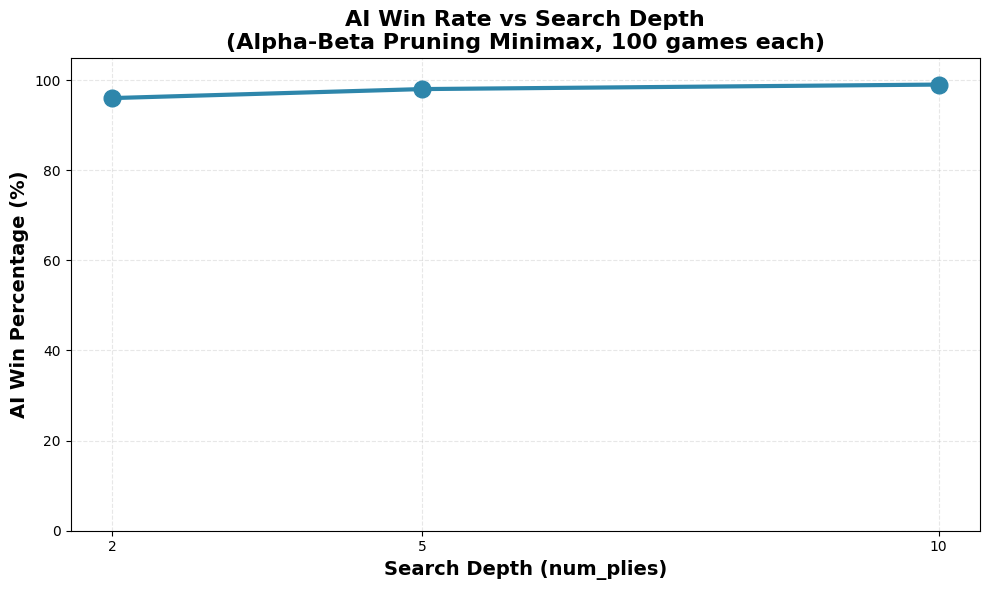

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(depth_results, win_percentages, marker='o', linewidth=3, markersize=12,
         color='#2E86AB')
plt.xlabel('Search Depth (num_plies)', fontsize=14, fontweight='bold')
plt.ylabel('AI Win Percentage (%)', fontsize=14, fontweight='bold')
plt.title('AI Win Rate vs Search Depth\n(Alpha-Beta Pruning Minimax, 100 games each)', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(depth_results)
plt.ylim(0, 105)

plt.tight_layout()
plt.savefig('ai_win_percentage_curve.png', dpi=300, bbox_inches='tight')
plt.show()

## This cell was pretty much just a single game test using Alpha-Beta Minimax with ply limit of 10 to see if it would even run to completion

In [ ]:
num_plies = 10
game = MancalaAI(pits_per_player=6, stones_per_pit=4)
state = game.initial # get initial state
moves = 0
start_time = time.time()
ai_move_time_arr = []
    
while not game.terminal_test(state):
    current_player = game.to_move(state)
    
    if current_player == 1: ## the AI player should be player 1
        ai_move_start_time = time.time()
        move = get_alpha_beta_minimax_move(game, state, num_plies) 
        ai_move_end_time = time.time()
        ai_move_time_arr.append(ai_move_end_time - ai_move_start_time)
    else:
        move = state.board.random_move_generator()
        
    if move is None:
        break

    state = game.result(state, move)
    moves += 1
        
end_time = time.time()

print(f"Total game time with depth 10: {end_time - start_time:.3f} seconds")
print(f"Average time per move for AI player with minimax alpha-beta pruning at depth 10: {np.mean(ai_move_time_arr):.3f} seconds")

Total game time with depth 10: 58.286 seconds
Average time per move for AI player with minimax alpha-beta pruning at depth 10: 4.483 seconds
